In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

from __future__ import division

In [2]:
smartphones = pd.read_csv('E:\Data Analytics\Data Science Projects\Smartphones\Smartphones.csv')

In [3]:
smartphones.head()

,Model,Brand,Price,RAM,ROM,Battery Capacity,Screen Size(Inch),SIM Type,System On Chip,Number Of Rear Cameras,Rear Camera(In Mega Pixel),Front Camera,Operating System,Rating
0,Redmi Note 7 Pro,Xiaomi,"13,999",4,64,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
1,Redmi Note 7 Pro,Xiaomi,"16,999",6,128,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
2,Redmi Note 7S,Xiaomi,"10,999",3,32,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.6
3,Redmi Note 7S,Xiaomi,"12,999",4,64,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.5
4,Redmi Note 7,Xiaomi,"9,999",3,32,4000,6.3,Dual Sim,Snapdragon 660,2,12.0,13,Android v9.0 (Pie),4.5


In [4]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
Model                         273 non-null object
Brand                         273 non-null object
Price                         273 non-null object
RAM                           273 non-null int64
ROM                           273 non-null int64
Battery Capacity              273 non-null int64
Screen Size(Inch)             273 non-null float64
SIM Type                      273 non-null object
System On Chip                273 non-null object
Number Of Rear Cameras        273 non-null int64
Rear Camera(In Mega Pixel)    273 non-null float64
Front Camera                  273 non-null int64
Operating System              273 non-null object
Rating                        269 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 29.9+ KB


In [5]:
#Group the smartphones based on the brand 
brands_group = smartphones.groupby('Brand')

#Find the count of mobiles released by each brand
brands_group = brands_group.size().reset_index('Brand')
brands_group.columns = ['Brand','Smartphones Released']
brands_group.head()

,Brand,Smartphones Released
0,Apple,9
1,Asus,10
2,Blackberry,3
3,Coolpad,4
4,Google,6


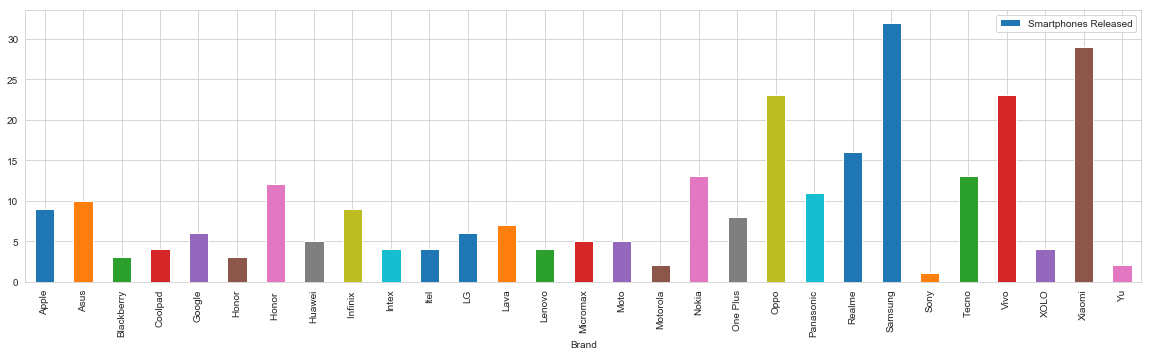

In [6]:
#Which Brand has released the most number of smartphones
brands_group.plot.bar(y = 'Smartphones Released',x = 'Brand',figsize = (20,5))

In [7]:
#Find the data type of each attribute
smartphones.dtypes

Model                          object
Brand                          object
Price                          object
RAM                             int64
ROM                             int64
Battery Capacity                int64
Screen Size(Inch)             float64
SIM Type                       object
System On Chip                 object
Number Of Rear Cameras          int64
Rear Camera(In Mega Pixel)    float64
Front Camera                    int64
Operating System               object
Rating                        float64
dtype: object

In [8]:
#Price is of Object datatype. Convert it to integer
smartphones['Price'] = smartphones.Price.str.replace(',','').astype(long)
smartphones.dtypes

Model                          object
Brand                          object
Price                           int64
RAM                             int64
ROM                             int64
Battery Capacity                int64
Screen Size(Inch)             float64
SIM Type                       object
System On Chip                 object
Number Of Rear Cameras          int64
Rear Camera(In Mega Pixel)    float64
Front Camera                    int64
Operating System               object
Rating                        float64
dtype: object

In [9]:
#Find the max price and minimum price of the smartphones
print('Max Price: \n')
print(smartphones[['Model','Brand','Price']][smartphones.Price == smartphones.Price.max()])
print('\n')
print('Min Price: \n')
print(smartphones[['Model','Brand','Price']][smartphones.Price == smartphones.Price.min()])

Max Price: 

             Model  Brand   Price
174  iPhone XS Max  Apple  134000
175      iPhone XS  Apple  134000


Min Price: 

        Model     Brand  Price
238  Spark Go  Micromax   3499


In [10]:
smartphones.head()

,Model,Brand,Price,RAM,ROM,Battery Capacity,Screen Size(Inch),SIM Type,System On Chip,Number Of Rear Cameras,Rear Camera(In Mega Pixel),Front Camera,Operating System,Rating
0,Redmi Note 7 Pro,Xiaomi,13999,4,64,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
1,Redmi Note 7 Pro,Xiaomi,16999,6,128,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
2,Redmi Note 7S,Xiaomi,10999,3,32,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.6
3,Redmi Note 7S,Xiaomi,12999,4,64,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.5
4,Redmi Note 7,Xiaomi,9999,3,32,4000,6.3,Dual Sim,Snapdragon 660,2,12.0,13,Android v9.0 (Pie),4.5


In [11]:
#Find the Highest Priced Smartphone in Each Brand
max_price = smartphones.groupby(['Brand'])['Price'].transform(max) == smartphones['Price']
max_price = smartphones[max_price]
max_price.head()

,Model,Brand,Price,RAM,ROM,Battery Capacity,Screen Size(Inch),SIM Type,System On Chip,Number Of Rear Cameras,Rear Camera(In Mega Pixel),Front Camera,Operating System,Rating
14,Black Shark 2,Xiaomi,49999,12,256,4000,6.39,Dual Sim,Snapdragon 855,2,48.0,20,Android v9.0 (Pie),NaN
38,Galaxy S10 Plus,Samsung,117900,12,1024,4100,6.40,Dual Sim,Exynos 9820,2,16.0,10,Android v9.0 (Pie),4.0
59,Realme 3 Pro,Realme,16999,6,128,4045,6.30,Dual Sim,Snapdragon 710,2,16.0,25,Android v9.0 (Pie),4.5
93,NEX,Vivo,39990,8,128,4000,6.59,Dual Sim,Snapdragon 845,2,12.0,8,Android v8.1 (Oreo),4.2
114,Find X,Oppo,58990,8,256,3730,6.40,Dual Sim,Snapdragon 845,2,20.0,25,Android v8.1 (Oreo),4.6


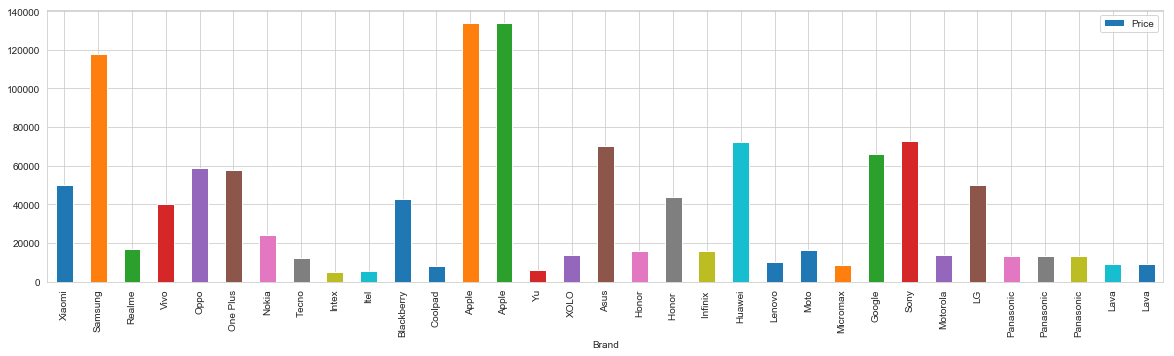

In [12]:
#Max Price of Each Brands

max_price.plot.bar(y = 'Price',x = 'Brand',figsize = (20,5))

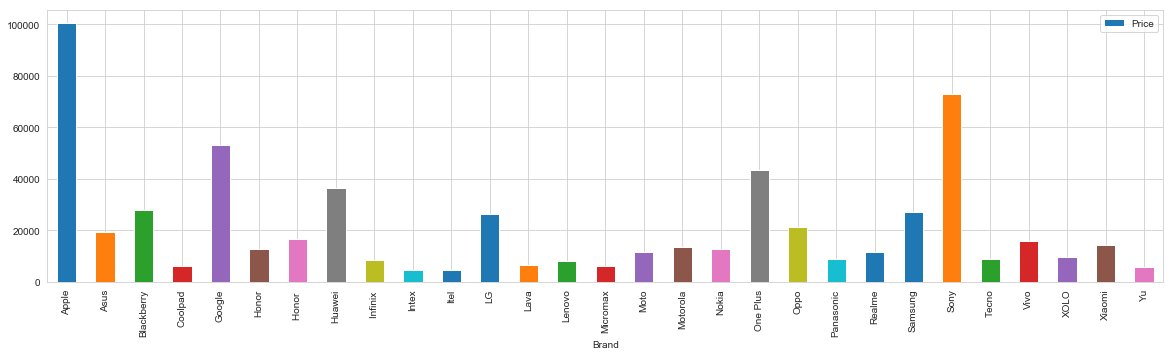

In [13]:
#Find the average price of each brands

averagePrice = pd.Series(smartphones.groupby('Brand')['Price'].mean())

average_price = averagePrice.to_frame()

average_price.plot.bar(y = 'Price',figsize = (20,5))

Text(0,0.5,'Number Of Smartphones')

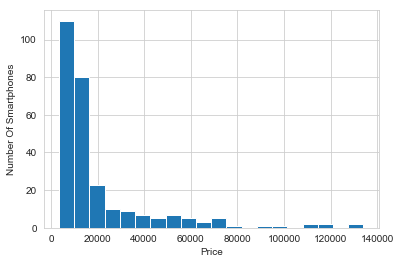

In [14]:
#We will make a histogram of prices

plt.hist(smartphones.Price,bins = 20)

#labels
plt.xlabel('Price')
plt.ylabel('Number Of Smartphones')

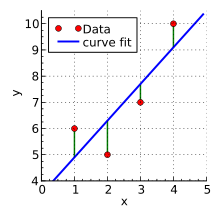

In [15]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

In [16]:
#One Hot Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
smartphonesEncoded = smartphones
smartphonesEncoded.drop('Model',axis='columns',inplace=True)
smartphones.head()

,Brand,Price,RAM,ROM,Battery Capacity,Screen Size(Inch),SIM Type,System On Chip,Number Of Rear Cameras,Rear Camera(In Mega Pixel),Front Camera,Operating System,Rating
0,Xiaomi,13999,4,64,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
1,Xiaomi,16999,6,128,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
2,Xiaomi,10999,3,32,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.6
3,Xiaomi,12999,4,64,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.5
4,Xiaomi,9999,3,32,4000,6.3,Dual Sim,Snapdragon 660,2,12.0,13,Android v9.0 (Pie),4.5


In [18]:
smartphonesEncoded.Brand = le.fit_transform(smartphonesEncoded['Brand'])
smartphonesEncoded['SIM Type'] = le.fit_transform(smartphonesEncoded['SIM Type'])
smartphonesEncoded['System On Chip'] = le.fit_transform(smartphonesEncoded['System On Chip'])
smartphonesEncoded['Operating System'] = le.fit_transform(smartphonesEncoded['Operating System'])
smartphonesEncoded.head()

,Brand,Price,RAM,ROM,Battery Capacity,Screen Size(Inch),SIM Type,System On Chip,Number Of Rear Cameras,Rear Camera(In Mega Pixel),Front Camera,Operating System,Rating
0,27,13999,4,64,4000,6.3,0,39,2,48.0,13,8,4.6
1,27,16999,6,128,4000,6.3,0,39,2,48.0,13,8,4.6
2,27,10999,3,32,4000,6.3,0,37,2,48.0,13,8,4.6
3,27,12999,4,64,4000,6.3,0,37,2,48.0,13,8,4.5
4,27,9999,3,32,4000,6.3,0,37,2,12.0,13,8,4.5


In [19]:
import sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [20]:
X_multi = smartphonesEncoded.drop('Price',axis = 'columns')

Y_Target = smartphonesEncoded.Price

X_multi.head()

,Brand,RAM,ROM,Battery Capacity,Screen Size(Inch),SIM Type,System On Chip,Number Of Rear Cameras,Rear Camera(In Mega Pixel),Front Camera,Operating System,Rating
0,27,4,64,4000,6.3,0,39,2,48.0,13,8,4.6
1,27,6,128,4000,6.3,0,39,2,48.0,13,8,4.6
2,27,3,32,4000,6.3,0,37,2,48.0,13,8,4.6
3,27,4,64,4000,6.3,0,37,2,48.0,13,8,4.5
4,27,3,32,4000,6.3,0,37,2,12.0,13,8,4.5


In [21]:
Y_Target.head()

0    13999
1    16999
2    10999
3    12999
4     9999
Name: Price, dtype: int64

In [22]:
X_multi.dtypes

Brand                           int32
RAM                             int64
ROM                             int64
Battery Capacity                int64
Screen Size(Inch)             float64
SIM Type                        int32
System On Chip                  int32
Number Of Rear Cameras          int64
Rear Camera(In Mega Pixel)    float64
Front Camera                    int64
Operating System                int32
Rating                        float64
dtype: object

In [23]:
X_multi = X_multi.drop('Rating',axis = 'columns')

In [24]:
lreg.fit(X_multi,Y_Target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
lreg.predict([[27,4,64,4000,6.3,0,39,2,48,13,8]])

array([ 13209.7368063])

In [26]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used was %d ' % len(lreg.coef_))

 The estimated intercept coefficient is -16562.57 
 The number of coefficients used was 11 


In [27]:
# Set a DataFrame from the Features
coeff_df = DataFrame(X_multi.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,Brand,-521.201442
1,RAM,2100.530876
2,ROM,133.945039
3,Battery Capacity,-5.231293
4,Screen Size(Inch),7442.933761
5,SIM Type,24700.114900
6,System On Chip,-192.293010
7,Number Of Rear Cameras,1888.615372
8,Rear Camera(In Mega Pixel),37.286847
9,Front Camera,-556.471956


In [28]:
#Testing And Training
import sklearn.model_selection
X_train,X_test,Y_train,Y_test = sklearn.model_selection.train_test_split(X_multi,Y_Target)

In [29]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

((204, 11), (69, 11), (204L,), (69L,))


In [30]:
# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [32]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train)))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test)))

Fit a model X_train, and calculate MSE with Y_train: 0.00
Fit a model X_train, and calculate MSE with X_test and Y_test: -882.76


Text(0.5,1,'Residual Plots')

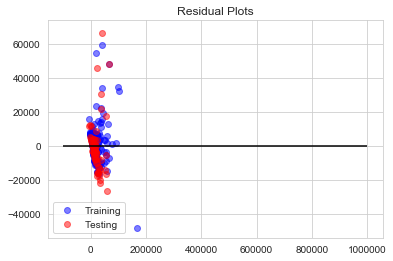

In [36]:
#Scatter plot the training data
train = plt.scatter(pred_train,(Y_train - pred_train), c = 'b', alpha = 0.5)

#Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test - pred_test), c = 'r',alpha = 0.5)

#Plot a horizontal axis line at 0
plt.hlines(y = 0,xmin = -100000,xmax = 1000000)

#Labels
plt.legend((train,test),('Training','Testing'),loc = 'lower left')
plt.title('Residual Plots')

In [44]:
print(np.sqrt(metrics.mean_squared_error(Y_test, pred_test)))

15360.286254
